<a href="https://colab.research.google.com/github/KaylaBai/Dissertation/blob/main/Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dissertation Code

#### Load Packages

In [1]:
pip install linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.8 MB/s eta 0:00:00


In [2]:
pip install libpysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 13.1 MB/s eta 0:00:00


In [3]:
pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for esda: filename=esda-2.4.3-py3-none-any.whl size=122762 sha256=f8f3acbe412c6bec7945010426b8fe18c823b2ca272bd2f24857d3c562766b32
  Stored in directory: /root/.cache/pip/wheels/ed/88/61/8705bb427b9aeb4ded8f07eb8ea3e8cada26881368c75619cb
Successfully built esda


In [4]:
pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.9/112.9 kB 12.4 MB/s eta 

In [5]:
# pip install geopandas shapely

In [6]:
# For processing data
import pandas as pd
import numpy as np
import geopandas as gpd
import numpy.linalg as la
from scipy import stats

# For Regression
from linearmodels import PooledOLS
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from linearmodels.panel import compare

# For spatial analysis
import libpysal
import esda
import pysal as ps

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing

### Geo Data

In [7]:
# Read Province boundaries shapefile
file_path = "https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/Province/province_boundaries.shp"
# provinces = gpd.read_file("/content/province_boundaries.shp").loc[:,["NAME","geometry"]]
provinces = gpd.read_file(file_path).loc[:,["NAME","geometry"]]

# check the coordinate refrencing system
print(provinces.crs)

PROJCS["China_Lambert_Conformal_Conic",GEOGCS["Beijing 1954",DATUM["Beijing_1954",SPHEROID["Krassowsky 1940",6378245,298.3,AUTHORITY["EPSG","7024"]],AUTHORITY["EPSG","6214"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["standard_parallel_1",30],PARAMETER["standard_parallel_2",62],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


The coordinate referencing system used here is China_Lambert_Conformal_Conic.

In [8]:
# Define the mapping dictionary of provinces to regions
region_mapping = {'North China':['Beijing','Tianjin','Hebei','Shanxi','Inner Mongolia'],
                  'East China':['Shanghai', 'Jiangsu','Zhejiang','Anhui','Fujian','Taiwan','Jiangxi','Shandong'],
                  'South Central China':['Henan','Hubei','Hunan','Guangdong','Guangxi','Hainan','Hong Kong','Macau'],
                  'Southwest China':['Chongqing','Sichuan','Guizhou','Yunnan','Tibet'],
                  'Northwest China':['Shaanxi','Gansu','Qinghai','Ningxia','Xinjiang'],
                  'Northeast China':['Liaoning','Jilin','Heilongjiang']
}


# Map provinces to regions using the region_mapping dictionary
provinces['Area'] = provinces['NAME'].apply(lambda province: next((region for region, provinces in region_mapping.items() if province in provinces), None))

# Reorder the columns with "Region" before "geometry"
provinces = provinces[['NAME', 'Area', 'geometry']]

provinces

,NAME,Area,geometry
0,Heilongjiang,Northeast China,"POLYGON ((1329152.341 5619034.278, 1323327.591..."
1,Xinjiang,Northwest China,"POLYGON ((-2189253.375 4611401.367, -2202922.3..."
2,Shanxi,North China,"POLYGON ((761692.092 4443124.843, 760999.873 4..."
3,Ningxia,Northwest China,"POLYGON ((-34477.046 4516813.963, -41105.128 4..."
4,Tibet,Southwest China,"POLYGON ((-2189253.375 4611401.367, -2187861.9..."
5,Shandong,East China,"POLYGON ((915805.657 4438424.999, 917551.296 4..."
6,Henan,South Central China,"POLYGON ((915805.657 4438424.999, 913869.987 4..."
7,Jiangsu,East China,"POLYGON ((1261146.339 4381810.235, 1264548.546..."
8,Anhui,East China,"POLYGON ((1016688.415 4289114.800, 1018854.016..."
9,Hubei,South Central China,"POLYGON ((547929.620 4087821.980, 551532.202 4..."


In [9]:
bd = provinces.drop([30,31,32],axis = 0).reset_index(drop = True)
bd

,NAME,Area,geometry
0,Heilongjiang,Northeast China,"POLYGON ((1329152.341 5619034.278, 1323327.591..."
1,Xinjiang,Northwest China,"POLYGON ((-2189253.375 4611401.367, -2202922.3..."
2,Shanxi,North China,"POLYGON ((761692.092 4443124.843, 760999.873 4..."
3,Ningxia,Northwest China,"POLYGON ((-34477.046 4516813.963, -41105.128 4..."
4,Tibet,Southwest China,"POLYGON ((-2189253.375 4611401.367, -2187861.9..."
5,Shandong,East China,"POLYGON ((915805.657 4438424.999, 917551.296 4..."
6,Henan,South Central China,"POLYGON ((915805.657 4438424.999, 913869.987 4..."
7,Jiangsu,East China,"POLYGON ((1261146.339 4381810.235, 1264548.546..."
8,Anhui,East China,"POLYGON ((1016688.415 4289114.800, 1018854.016..."
9,Hubei,South Central China,"POLYGON ((547929.620 4087821.980, 551532.202 4..."


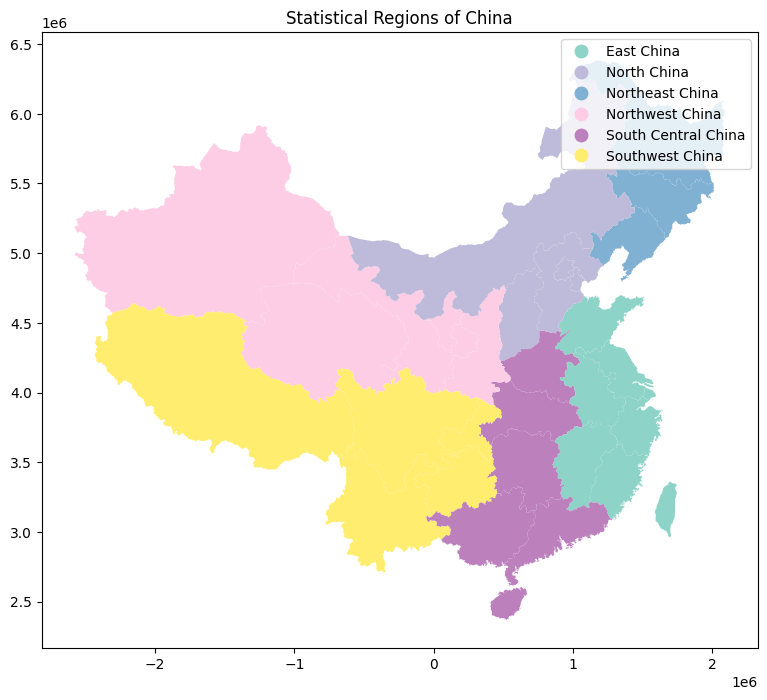

In [10]:
# Plot provinces with different colors for each region and add a legend
fig, ax = plt.subplots(figsize=(10, 8))
provinces.plot(column='Area', legend=True, ax=ax, cmap='Set3')
plt.title('Statistical Regions of China')
plt.show()

### GRP

In [11]:
# Read the CSV file into a DataFrame
df_GRP = pd.read_csv("https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/grp_data.csv", index_col=0, header=0).iloc[:, ::-1]

df_GRP.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,5267.2,6252.5,7149.8,8387.0,10425.5,11813.1,12900.9,14964.0,17188.8,19024.7,21134.6,22926.0,24779.1,27041.2,29883.0,33106.0,35445.1,35943.3,41045.6,41610.9
Tianjin,2257.8,2621.1,3158.6,3538.2,4158.4,5182.4,5709.6,6830.8,8112.5,9043.0,9945.4,10640.6,10879.5,11477.2,12450.6,13362.9,14055.5,14008.0,15685.1,16311.3
Hebei,6333.6,7588.6,8773.4,10043.0,12152.9,14200.1,15306.9,18003.6,21384.7,23077.5,24259.6,25208.9,26398.4,28474.1,30640.8,32494.6,34978.6,36013.8,40397.1,42370.4
Shanxi,2854.3,3496.0,4079.4,4713.6,5935.6,7223.0,7147.6,8903.9,10894.4,11683.1,11987.2,12094.7,11836.4,11946.4,14484.3,15958.1,16961.6,17835.6,22870.4,25642.6
Inner Mongolia,2388.4,2942.4,3523.7,4161.8,5166.9,6242.4,7104.2,8199.9,9458.1,10470.1,11392.4,12158.2,12949.0,13789.3,14898.1,16140.8,17212.5,17258.0,21166.0,23158.6


In [12]:

# Create a new DataFrame 'GRP_growth' to store the calculated growth rates
GRP_growth = pd.DataFrame(index=df_GRP.index, columns=df_GRP.columns)

# Calculate the growth rate for each province and year combination
GRP_growth = df_GRP.pct_change(axis=1) * 100
GRP_growth.head()


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,NaN,18.706334,14.351060,17.303981,24.305473,13.309673,9.208421,15.991908,14.867682,10.680792,11.090319,8.476148,8.082963,9.129064,10.509149,10.785396,7.065487,1.405554,14.195413,1.377249
Tianjin,NaN,16.090885,20.506658,12.017983,17.528687,24.624856,10.172893,19.637102,18.763542,11.469954,9.978989,6.990166,2.245174,5.493819,8.481163,7.327358,5.183007,-0.337946,11.972444,3.992324
Hebei,NaN,19.814955,15.612893,14.471015,21.008663,16.845362,7.794311,17.617545,18.780133,7.915940,5.122305,3.913090,4.718572,7.862977,7.609371,6.050103,7.644347,2.959524,12.171168,4.884757
Shanxi,NaN,22.481869,16.687643,15.546404,25.924983,21.689467,-1.043888,24.571884,22.355372,7.239499,2.602905,0.896790,-2.135646,0.929337,21.244057,10.175155,6.288343,5.152816,28.228935,12.121345
Inner Mongolia,NaN,23.195445,19.755982,18.108806,24.150608,20.815189,13.805588,15.423271,15.344090,10.699823,8.808894,6.722025,6.504252,6.489304,8.041017,8.341332,6.639696,0.264343,22.644571,9.414155


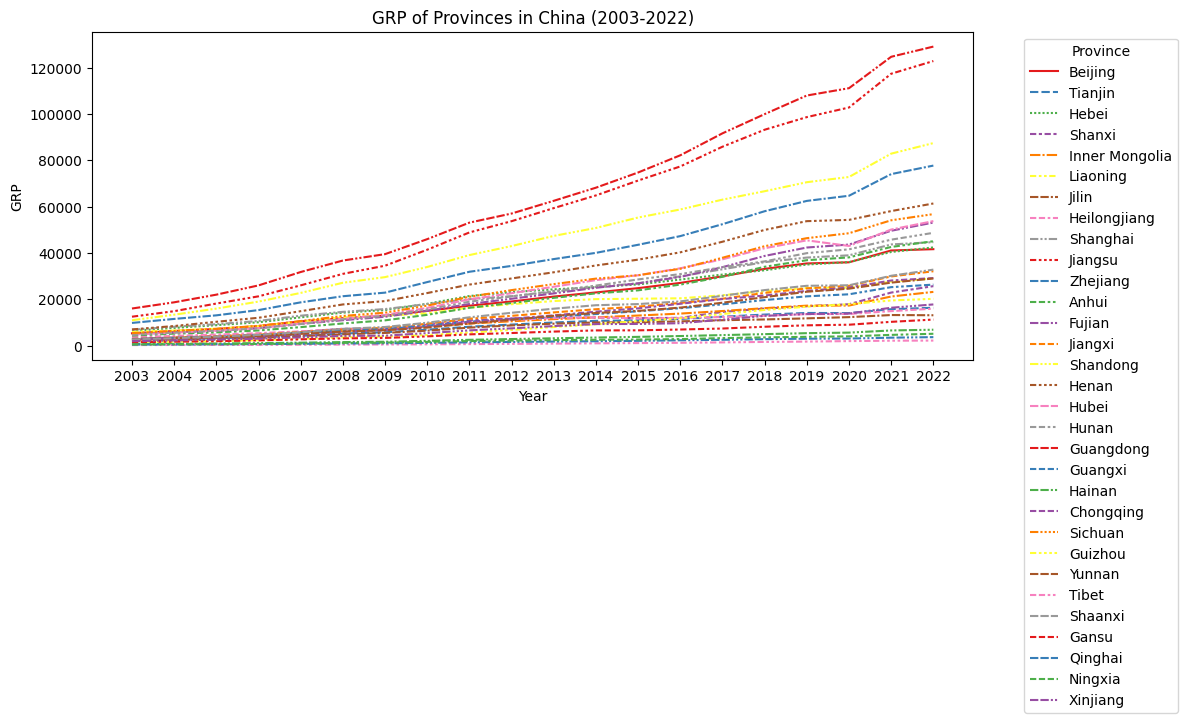

In [13]:
#Draw line plots for each province using Seaborn
plt.figure(figsize=(12, 6))
sns.set_palette("Set1", n_colors=len(df_GRP))
sns.lineplot(data=df_GRP.T)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('GRP of Provinces in China (2003-2022)')
plt.xlabel('Year')
plt.ylabel('GRP')
plt.tight_layout()
plt.show()

### GRP per capita

In [14]:
#Read the CSV file into a DataFrame
df_GRPpc = pd.read_csv("https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/grp_pc.csv", index_col=0, header=0).iloc[:, ::-1]

df_GRPpc.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,36583,42402,47182,53438,63629,68541,71059,78307,86246,92758,100569,106732,113692,123391,136172,150962,161776,164158,187526,190313
Tianjin,22371,25761,30567,33411,37976,45242,47497,54053,61458,66517,71345,74960,75868,79647,87280,95689,101557,101068,113660,119235
Hebei,9380,11178,12845,14609,17561,20385,21831,25308,29647,31844,33346,34507,35994,38688,41451,43808,47036,48302,54181,56995
Shanxi,8639,10515,12195,14008,17542,21234,20906,25434,30534,32864,33848,34248,33593,33972,41242,45517,48469,51051,65625,73675
Inner Mongolia,10015,12315,14695,17275,21334,25620,28982,33262,38276,42441,46320,49585,52972,56560,61196,66491,71170,71640,88137,96474


In [15]:
# # LLC test for
# from statsmodels.tsa.stattools import adfuller

# def llc_test(series):
#     result = adfuller(series)
#     return result[1]  # 返回p值

# p_values = df_GRPpc.T.apply(llc_test)
# p_values


In [16]:

#Create a new DataFrame 'GRPpc_growth' to store the calculated growth rates
GRPpc_growth = pd.DataFrame(index=df_GRPpc.index, columns=df_GRPpc.columns)

#Calculate the growth rate for each province and year combination
GRPpc_growth = df_GRPpc.pct_change(axis=1) * 100
GRPpc_growth.head()

# Display the 'GRPpc_growth' DataFrame
GRPpc_growth.head()


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,NaN,15.906295,11.273053,13.259294,19.070699,7.719750,3.673714,10.199975,10.138302,7.550495,8.420837,6.128131,6.521006,8.530943,10.358130,10.861264,7.163392,1.472406,14.235066,1.486194
Tianjin,NaN,15.153547,18.656108,9.304152,13.663165,19.133137,4.984307,13.802977,13.699517,8.231638,7.258295,5.066928,1.211313,4.981020,9.583537,9.634510,6.132366,-0.481503,12.458939,4.904980
Hebei,NaN,19.168443,14.913222,13.732970,20.206722,16.081089,7.093451,15.926893,17.144776,7.410531,4.716744,3.481677,4.309271,7.484581,7.141749,5.686232,7.368517,2.691555,12.171339,5.193703
Shanxi,NaN,21.715476,15.977175,14.866749,25.228441,21.046631,-1.544692,21.658854,20.051899,7.630838,2.994158,1.181754,-1.912520,1.128211,21.399976,10.365647,6.485489,5.327116,28.547923,12.266667
Inner Mongolia,NaN,22.965552,19.326025,17.556992,23.496382,20.089997,13.122560,14.767787,15.074259,10.881492,9.139747,7.048791,6.830695,6.773390,8.196605,8.652526,7.037043,0.660391,23.027638,9.459137


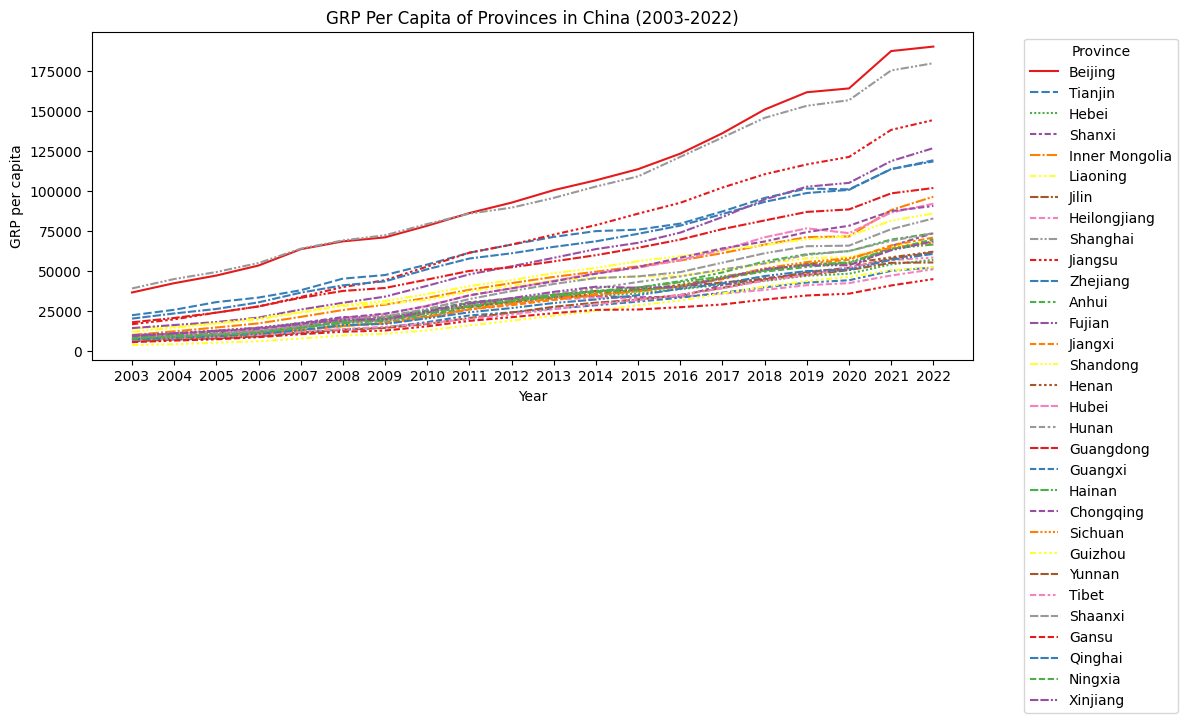

In [17]:
#Draw line plots for each province using Seaborn
plt.figure(figsize=(12, 6))
sns.set_palette("Set1", n_colors=len(df_GRPpc))
sns.lineplot(data=df_GRPpc.T)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('GRP Per Capita of Provinces in China (2003-2022)')
plt.xlabel('Year')
plt.ylabel('GRP per capita')
plt.tight_layout()
plt.show()

### Resource Dependence

In [18]:
# Read data
df_mining_inv = pd.read_csv('https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/fixedinv_mining.csv', index_col='Region')
df_all_inv = pd.read_csv('https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/fixedinv_all.csv', index_col='Region')

df_mining_inv = df_mining_inv.iloc[:, ::-1]
df_all_inv = df_all_inv.iloc[:, ::-1]

# Calculate the proportion of fixed investment in mining to total fixed investment for each year and province
RD = df_mining_inv.div(df_all_inv)

# check the result
RD.head()


,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Region,,,,,,,,,,,,,,
Beijing,0.002175,0.001556,0.002245,0.003122,0.008048,0.005003,0.001721,0.001559,0.000703,0.001329,0.001040,0.000347,0.000365,0.000370
Tianjin,0.095127,0.083138,0.100687,0.077005,0.079179,0.083302,0.049155,0.032189,0.025079,0.035969,0.029939,0.022405,0.008576,0.015405
Hebei,0.018547,0.032394,0.044295,0.042355,0.040241,0.029047,0.029151,0.035145,0.031559,0.029792,0.024738,0.019071,0.013934,0.011408
Shanxi,0.119814,0.161885,0.155783,0.143526,0.150487,0.139282,0.176293,0.201595,0.178455,0.133703,0.114517,0.100247,0.074278,0.077808
Inner Mongolia,0.061521,0.097443,0.121343,0.135334,0.166910,0.131583,0.111231,0.094123,0.094007,0.111638,0.096750,0.068865,0.059954,0.065952


In [19]:
RD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Beijing to Xinjiang
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2004    31 non-null     float64
 1   2005    31 non-null     float64
 2   2006    31 non-null     float64
 3   2007    31 non-null     float64
 4   2008    31 non-null     float64
 5   2009    31 non-null     float64
 6   2010    31 non-null     float64
 7   2011    31 non-null     float64
 8   2012    31 non-null     float64
 9   2013    31 non-null     float64
 10  2014    31 non-null     float64
 11  2015    31 non-null     float64
 12  2016    31 non-null     float64
 13  2017    31 non-null     float64
dtypes: float64(14)
memory usage: 3.6+ KB


### Control Variables


**Foreign Direct Investment(FDI)**      \
Use the total investment of foreign funded enterprises to stand for Foreign direct investment.外商投资企业投资总额（Foreign Invested Enterprises Total Investment）和外商直接投资（Foreign Direct Investment，FDI）不完全相同，但它们之间存在一定的关联。

外商投资企业投资总额是指外国投资者在中国设立的企业的累计总投资金额，包括注册资本、股权、债券等形式的投资。这个概念更加广泛，不仅包括外商直接投资，还包括其他形式的外国投资。这些投资可以通过设立独资企业、合资企业、合作企业等方式进行。

外商直接投资是指外国投资者通过购买股权、设立合资企业等方式，在其他国家或地区直接投资。在中国的情况下，外商直接投资通常是指外国投资者在中国境内设立企业或购买已有企业的股权，以及其他类似的直接投资活动。

因此，外商投资企业投资总额包含了外商直接投资，但外商投资企业投资总额的范围更广，还包括其他形式的外国投资。

In [20]:
# Step 1: Read the CSV file into a DataFrame.
df_FDI = pd.read_csv("https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/FDI.csv", index_col=0, header=0).iloc[:, ::-1]

df_FDI.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Region,,,,,,,,,,,,,,,,,,,
Beijing,46328,53162,60670,69700,87621,98295,106600,119206,134364,149355,177105,201027,380963,427371,486409,547718,599561,646907,717181
Tianjin,41555,47045,56770,68600,82888,93814,97700,109624,114806,118913,127423,144146,181328,222594,254823,290620,310544,306423,1021673
Hebei,17519,20057,21930,24700,29113,33841,37000,40348,45700,48960,54542,62135,73624,84821,95818,108665,158991,225402,235381
Shanxi,6119,6913,7710,11100,17787,18000,20500,22929,31899,31963,34182,39119,41107,42163,49724,63011,70136,92559,89039
Inner Mongolia,3836,10811,12640,14800,17148,22155,24000,23243,25519,25802,22911,26449,35142,41080,45979,44853,58421,56084,60615


**Urbanization**\
城镇化水平由各省的城镇人口与年末常住人口之比表示。

In [21]:
# Read data
population = pd.read_csv('https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/population.csv', index_col='Region').iloc[:, ::-1]
population_urb = pd.read_csv('https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/urban_population.csv', index_col='Region').iloc[:, ::-1]

# Calculate the proportion of the urban population to total population for each year and province
urb = population_urb.div(population) * 100

# check the result
urb.head()


,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,,,,,,,,,,,,,
Beijing,NaN,NaN,83.615085,84.322299,84.486874,84.923772,85.000000,85.932722,86.215415,86.284889,86.400000,86.503915,86.700183,86.742597,86.918870,87.089416,87.351598,87.528552,87.528552,NaN
Tianjin,NaN,NaN,75.071908,75.720930,76.322870,77.210884,78.013029,79.599692,80.462342,81.567489,82.269504,82.575227,82.904795,83.298683,83.546099,83.947939,84.332130,84.715213,84.850692,NaN
Hebei,NaN,NaN,37.687929,38.764859,40.256373,41.894405,43.744669,44.495413,45.589049,46.598733,48.024149,49.365014,51.667801,53.871186,55.743015,57.325613,58.775346,60.075027,61.143931,NaN
Shanxi,NaN,NaN,42.116244,42.992593,44.031830,45.118734,45.987744,48.041410,49.803481,51.324690,52.871287,54.308390,55.868144,57.256688,58.603989,59.851513,61.281098,62.521490,63.419540,NaN
Inner Mongolia,NaN,NaN,47.191011,48.654244,50.144092,51.718494,53.417413,55.501618,57.044534,58.400974,59.837067,60.963659,62.090164,63.382594,64.611591,65.524360,66.459627,67.498960,68.208333,NaN


国家统计局从2006年开始公布各省市的人口城乡构成，因此数据从2005开始。需要舍弃2003及2004年的数据。2022年城镇人口数尚未公布，因此同样为NULL。

**Innovation**\
Represented by the number of domestic patents application accepted.

In [22]:
# Read in data
df_patent = pd.read_csv('https://raw.githubusercontent.com/KaylaBai/Dissertation/main/Data/patents.csv', index_col='Region').iloc[:,::-1]

df_patent.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Region,,,,,,,,,,,,,,,,,,,
Beijing,17003,18402,22572,26555,31680,43508,50236,57296,77955,92305,123336,138111,156312,189129,185928,211212,226113,254165,283134
Tianjin,6812,8406,11657,13299,15744,18230,19624,25973,38489,41009,60915,63422,79963,106514,86996,99038,96045,111514,90471
Hebei,5623,5647,6401,7220,7853,9128,11361,12295,17595,23241,27619,30000,44060,54838,61288,83785,101274,125608,130705
Shanxi,1743,1949,1985,2824,3333,5386,6822,7927,12769,16786,18859,15687,14948,20031,20697,27106,31705,40302,40460
Inner Mongolia,1393,1457,1455,1946,2015,2221,2484,2912,3841,4732,6388,6359,8876,10672,11701,16426,21069,26224,29462


### Merge data

In [23]:
# Turn GRP per capita data into long data
GRPpc_0517 = df_GRPpc.iloc[:,2:-5]
GRPpc_0517_long = GRPpc_0517.reset_index().melt(id_vars = "Region",var_name='Year', value_name='GRPpc')
GRPpc_0517_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Region  403 non-null    object
 1   Year    403 non-null    object
 2   GRPpc   403 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.6+ KB


In [24]:
# Turn GRP per capita growth rate data into long data
GRPpc_growth_0517 = GRPpc_growth.iloc[:,2:-5]
GRPpc_growth_0517_long = GRPpc_growth_0517.reset_index().melt(id_vars = "Region",var_name='Year', value_name='GRPpcGrowth')
GRPpc_growth_0517_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       403 non-null    object 
 1   Year         403 non-null    object 
 2   GRPpcGrowth  403 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.6+ KB


In [25]:
# Turn Resource Dependence data into long data
RD_0517 = RD.iloc[:,1::]
RD_0517_long = RD_0517.reset_index().melt(id_vars = "Region",var_name='Year', value_name='RD')
RD_0517_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  403 non-null    object 
 1   Year    403 non-null    object 
 2   RD      403 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.6+ KB


In [26]:
# Turn FDI data into long data
FDI_0517 = df_FDI.iloc[:,2:-4]
FDI_0517_long = FDI_0517.reset_index().melt(id_vars = "Region",var_name='Year', value_name='FDI')
FDI_0517_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Region  403 non-null    object
 1   Year    403 non-null    object
 2   FDI     403 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.6+ KB


In [27]:
# Turn urbanization data into long data
urb_0517 = urb.iloc[:,2:-5]
urb_0517_long = urb_0517.reset_index().melt(id_vars = "Region",var_name='Year', value_name='URB')
urb_0517_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  403 non-null    object 
 1   Year    403 non-null    object 
 2   URB     403 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.6+ KB


In [28]:
# Turn df_patent into long data
patent_0517 = df_patent.iloc[:,2:-4]
pat_0517_long = patent_0517.reset_index().melt(id_vars = "Region",var_name='Year', value_name='INN')
patent_0517.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Region,,,,,,,,,,,,,
Beijing,22572,26555,31680,43508,50236,57296,77955,92305,123336,138111,156312,189129,185928
Tianjin,11657,13299,15744,18230,19624,25973,38489,41009,60915,63422,79963,106514,86996
Hebei,6401,7220,7853,9128,11361,12295,17595,23241,27619,30000,44060,54838,61288
Shanxi,1985,2824,3333,5386,6822,7927,12769,16786,18859,15687,14948,20031,20697
Inner Mongolia,1455,1946,2015,2221,2484,2912,3841,4732,6388,6359,8876,10672,11701


In [264]:
# Merge the dataframes based on "Region" and "Year"
df = pd.merge(RD_0517_long, GRPpc_growth_0517_long, on=['Region', 'Year'])
df = df.merge(GRPpc_0517_long, how="left", on=['Region', 'Year'])
df = df.merge(FDI_0517_long, how="left", on=['Region', 'Year'])
df = df.merge(urb_0517_long, how="left", on=['Region', 'Year'])
df = df.merge(pat_0517_long, how="left", on=['Region', 'Year'])
df = df.merge(bd, how="left",left_on="Region",right_on="NAME").drop(["NAME"],axis=1)
gdf = gpd.GeoDataFrame(df, geometry="geometry")
gdf['year'] = gdf["Year"]
gdf['region'] = gdf["Region"]
gdf['Year'] = pd.to_numeric(gdf['Year'])
gdf.set_index(['Region', 'Year'], inplace=True)
gdf.rename(columns = {'region':'Region', 'year':'Year'},inplace = True)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 403 entries, ('Beijing', 2005) to ('Xinjiang', 2017)
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   RD           403 non-null    float64 
 1   GRPpcGrowth  403 non-null    float64 
 2   GRPpc        403 non-null    int64   
 3   FDI          403 non-null    int64   
 4   URB          403 non-null    float64 
 5   INN          403 non-null    int64   
 6   Area         403 non-null    object  
 7   geometry     403 non-null    geometry
 8   Year         403 non-null    object  
 9   Region       403 non-null    object  
dtypes: float64(3), geometry(1), int64(3), object(3)
memory usage: 34.3+ KB


In [265]:
gdf = gdf[['Region','Year','Area','GRPpc','GRPpcGrowth','RD','FDI','URB','INN','geometry']]
# Print the updated GeoDataFrame
gdf.info()
# Export GeoDataFrame as a shapefile
# gdf.to_file("/Users/kerubai/Desktop/Merged_data/output_shapefile.shp")

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 403 entries, ('Beijing', 2005) to ('Xinjiang', 2017)
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Region       403 non-null    object  
 1   Year         403 non-null    object  
 2   Area         403 non-null    object  
 3   GRPpc        403 non-null    int64   
 4   GRPpcGrowth  403 non-null    float64 
 5   RD           403 non-null    float64 
 6   FDI          403 non-null    int64   
 7   URB          403 non-null    float64 
 8   INN          403 non-null    int64   
 9   geometry     403 non-null    geometry
dtypes: float64(3), geometry(1), int64(3), object(3)
memory usage: 34.3+ KB


## Exploratory Spatial Data Analysis

### Mapping

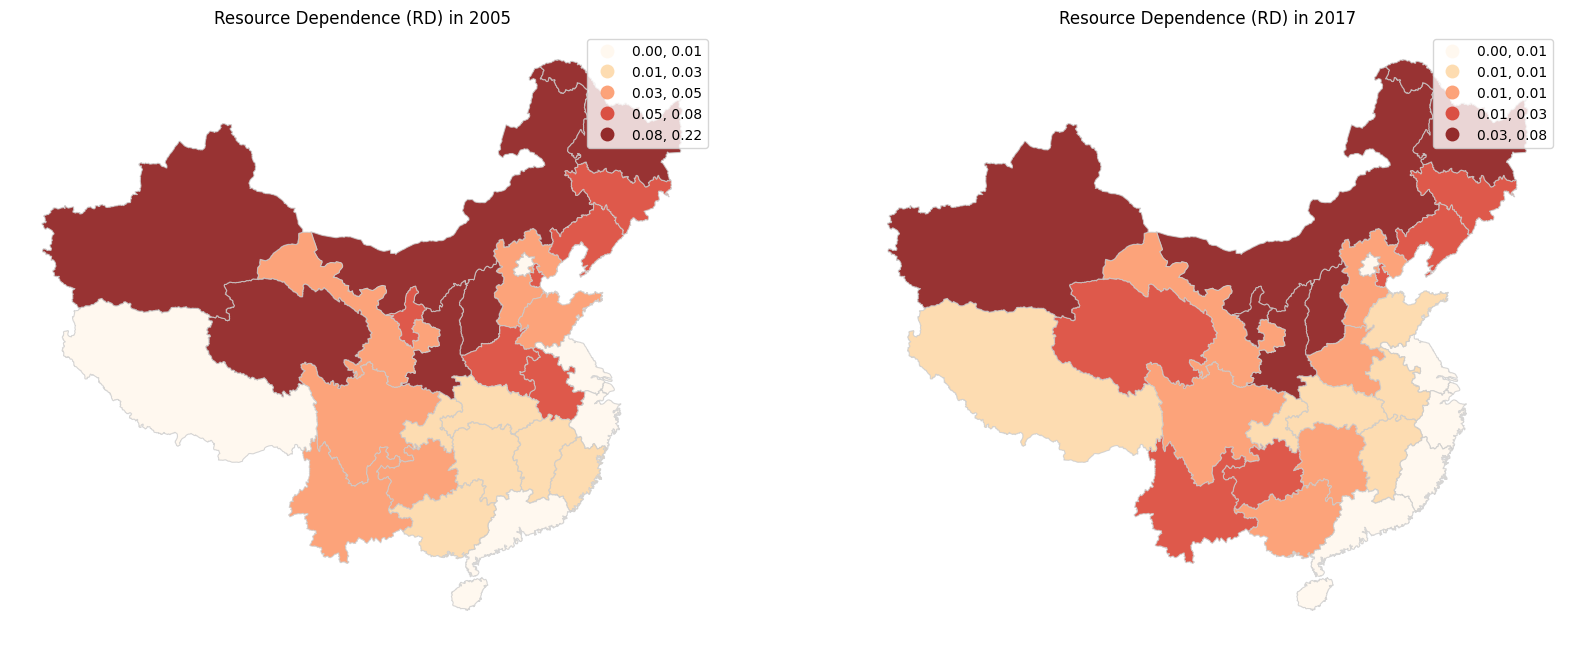

In [226]:
# Filter the df_merged dataframe for the year 2005 and 2017
gdf_2005 = gdf[gdf.index.get_level_values("Year")== 2005]
gdf_2017 = gdf[gdf.index.get_level_values("Year")== 2017]
# Plotting choropleth maps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Choropleth map for RD values at year 2005
gdf_2005.plot(column="RD", cmap="OrRd", linewidth=0.8, ax=ax1, edgecolor="0.8", alpha = 0.8,scheme="quantiles", legend=True)
ax1.set_title("Resource Dependence (RD) in 2005")
ax1.axis("off")

# Choropleth map for RD values at year 2017
gdf_2017.plot(column="RD", cmap="OrRd", linewidth=0.8, ax=ax2, edgecolor="0.8", alpha = 0.8, scheme="quantiles", legend=True)
ax2.set_title("Resource Dependence (RD) in 2017")
ax2.axis("off")

# Show the plot
plt.show()

In [227]:
 # # Plotting choropleth maps side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# # Choropleth map for GRPpc growth rate at year 2005
# gdf_2005.plot(column="GRPpcGrowth", cmap="OrRd", linewidth=0.8, ax=ax1, edgecolor="0.8", legend=True)
# ax1.set_title("GRP per capita Growth Rate in 2005")
# ax1.axis("off")

# # Choropleth map for GRPpc growth rate at year 2017
# gdf_2017.plot(column="GRPpcGrowth", cmap="OrRd", linewidth=0.8, ax=ax2, edgecolor="0.8", legend=True)
# ax2.set_title("GRP per capita Growth Rate in 2017")
# ax2.axis("off")

# # Show the plot
# plt.show()

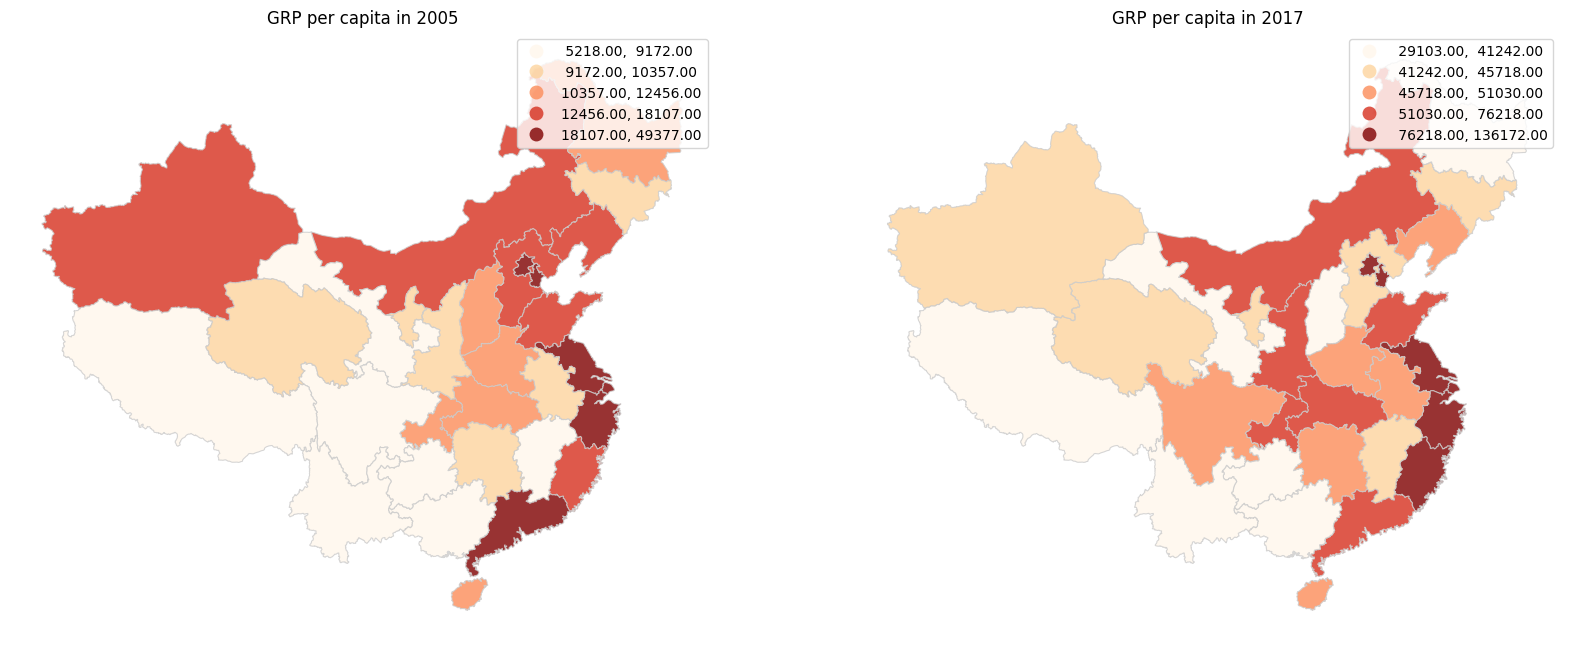

In [228]:
# Plotting choropleth maps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Choropleth map for GRPpc at year 2005
gdf_2005.plot(column="GRPpc", cmap="OrRd", linewidth=0.8, ax=ax1, edgecolor="0.8", alpha = 0.8,scheme="quantiles",legend=True)
ax1.set_title("GRP per capita in 2005")
ax1.axis("off")

# Choropleth map for GRPpc at year 2017
gdf_2017.plot(column="GRPpc", cmap="OrRd", linewidth=0.8, ax=ax2, edgecolor="0.8", alpha = 0.8, scheme="quantiles",legend=True)
ax2.set_title("GRP per capita in 2017")
ax2.axis("off")

# Show the plot
plt.show()

### Regional Comparison of Same year Scatter Plots

In [229]:
# # Scatter plot for Year 2005
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.scatter(gdf.loc[(slice(None), 2005), 'RD'], gdf.loc[(slice(None), 2005), 'GRPpcGrowth'], alpha=0.5)
# plt.axhline(gdf.loc[(slice(None), 2005), 'GRPpcGrowth'].mean(), color='red', linestyle='dashed', label='Mean GRPpcGrowth')
# plt.axvline(gdf.loc[(slice(None), 2005), 'RD'].mean(), color='blue', linestyle='dashed', label='Mean RD')
# for index, row in gdf.loc[(slice(None), 2005), :].iterrows():
#     plt.text(row['RD'], row['GRPpcGrowth'], index[0], ha='center', va='bottom')
# plt.xlabel('RD at Year 2005')
# plt.ylabel('GRPpcGrowth at Year 2005')
# plt.legend()

# # Scatter plot for Year 2017
# plt.subplot(1, 2, 2)
# plt.scatter(gdf.loc[(slice(None), 2017), 'RD'], gdf.loc[(slice(None), 2017), 'GRPpcGrowth'], alpha=0.5)
# plt.axhline(gdf.loc[(slice(None), 2017), 'GRPpcGrowth'].mean(), color='red', linestyle='dashed', label='Mean GRPpcGrowth')
# plt.axvline(gdf.loc[(slice(None), 2017), 'RD'].mean(), color='blue', linestyle='dashed', label='Mean RD')
# for index, row in gdf.loc[(slice(None), 2017), :].iterrows():
#     plt.text(row['RD'], row['GRPpcGrowth'], index[0], ha='center', va='bottom')
# plt.xlabel('RD at Year 2017')
# plt.ylabel('GRPpcGrowth at Year 2017')
# plt.legend()

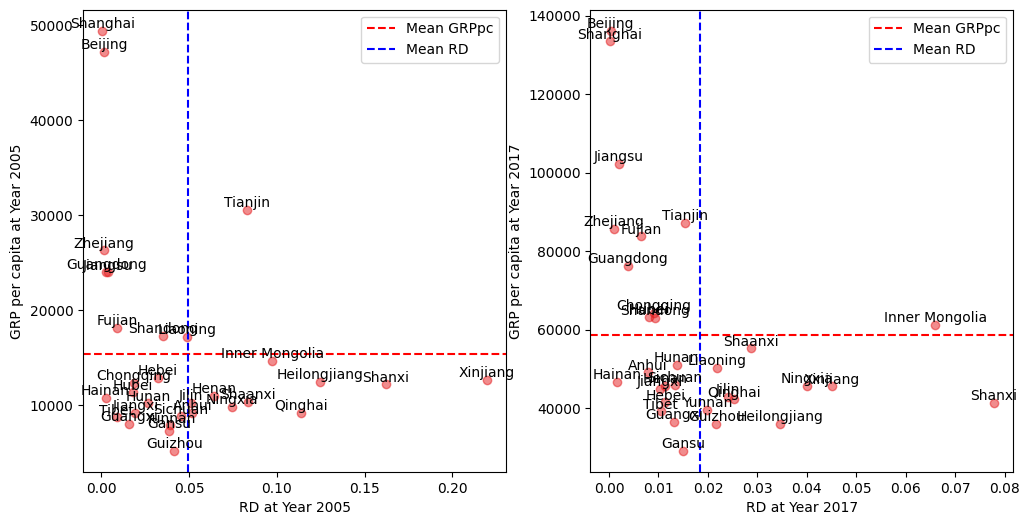

In [230]:
# Scatter plot for Year 2005
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(gdf.loc[(slice(None), 2005), 'RD'], gdf.loc[(slice(None), 2005), 'GRPpc'], alpha=0.5)
plt.axhline(gdf.loc[(slice(None), 2005), 'GRPpc'].mean(), color='red', linestyle='dashed', label='Mean GRPpc')
plt.axvline(gdf.loc[(slice(None), 2005), 'RD'].mean(), color='blue', linestyle='dashed', label='Mean RD')
for index, row in gdf.loc[(slice(None), 2005), :].iterrows():
    plt.text(row['RD'], row['GRPpc'], index[0], ha='center', va='bottom')
plt.xlabel('RD at Year 2005')
plt.ylabel('GRP per capita at Year 2005')
plt.legend()

# Scatter plot for Year 2017
plt.subplot(1, 2, 2)
plt.scatter(gdf.loc[(slice(None), 2017), 'RD'], gdf.loc[(slice(None), 2017), 'GRPpc'], alpha=0.5)
plt.axhline(gdf.loc[(slice(None), 2017), 'GRPpc'].mean(), color='red', linestyle='dashed', label='Mean GRPpc')
plt.axvline(gdf.loc[(slice(None), 2017), 'RD'].mean(), color='blue', linestyle='dashed', label='Mean RD')
for index, row in gdf.loc[(slice(None), 2017), :].iterrows():
    plt.text(row['RD'], row['GRPpc'], index[0], ha='center', va='bottom')
plt.xlabel('RD at Year 2017')
plt.ylabel('GRP per capita at Year 2017')
plt.legend()

### Pooled Bar plots

In [266]:
gdf_plt = gdf.copy()
gdf_plt['RD_sqrt'] = np.sqrt(gdf_plt['RD'])
gdf_plt['lnGRPpc'] = np.log(gdf_plt['GRPpc'])
gdf_plt['lnRD'] = np.log(gdf_plt['RD'])
gdf_plt['lnFDI'] = np.log(gdf_plt['FDI'])
gdf_plt['lnINN'] = np.log(gdf_plt['INN'])
gdf_plt['log_GRPpc'] = np.log10(gdf_plt['GRPpc'])
gdf_plt['log_RD'] = np.log10(gdf_plt['RD'])
gdf_plt['log_FDI'] = np.log10(gdf_plt['FDI'])
gdf_plt['log_INN'] = np.log10(gdf_plt['INN'])

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 403 entries, ('Beijing', 2005) to ('Xinjiang', 2017)
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Region       403 non-null    object  
 1   Year         403 non-null    object  
 2   Area         403 non-null    object  
 3   GRPpc        403 non-null    int64   
 4   GRPpcGrowth  403 non-null    float64 
 5   RD           403 non-null    float64 
 6   FDI          403 non-null    int64   
 7   URB          403 non-null    float64 
 8   INN          403 non-null    int64   
 9   geometry     403 non-null    geometry
dtypes: float64(3), geometry(1), int64(3), object(3)
memory usage: 34.3+ KB


<Figure size 1200x1200 with 0 Axes>

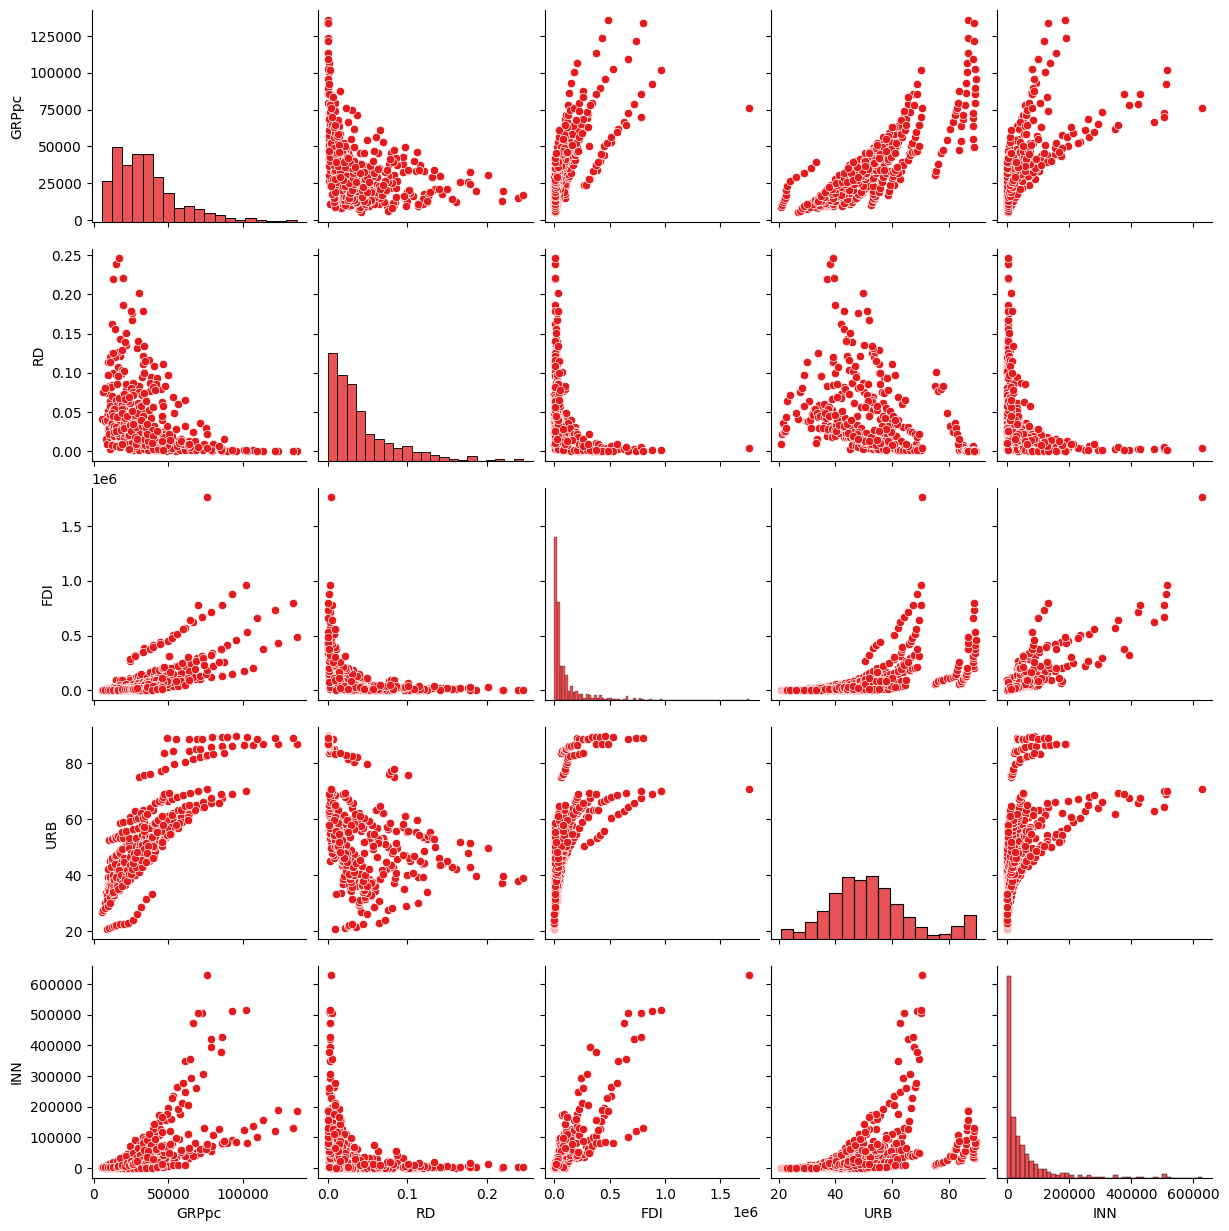

In [232]:
plt.figure(figsize = (12,12))
sns.pairplot(gdf_plt[['GRPpc','RD','FDI','URB','INN']])
plt.show()

<Figure size 1200x1200 with 0 Axes>

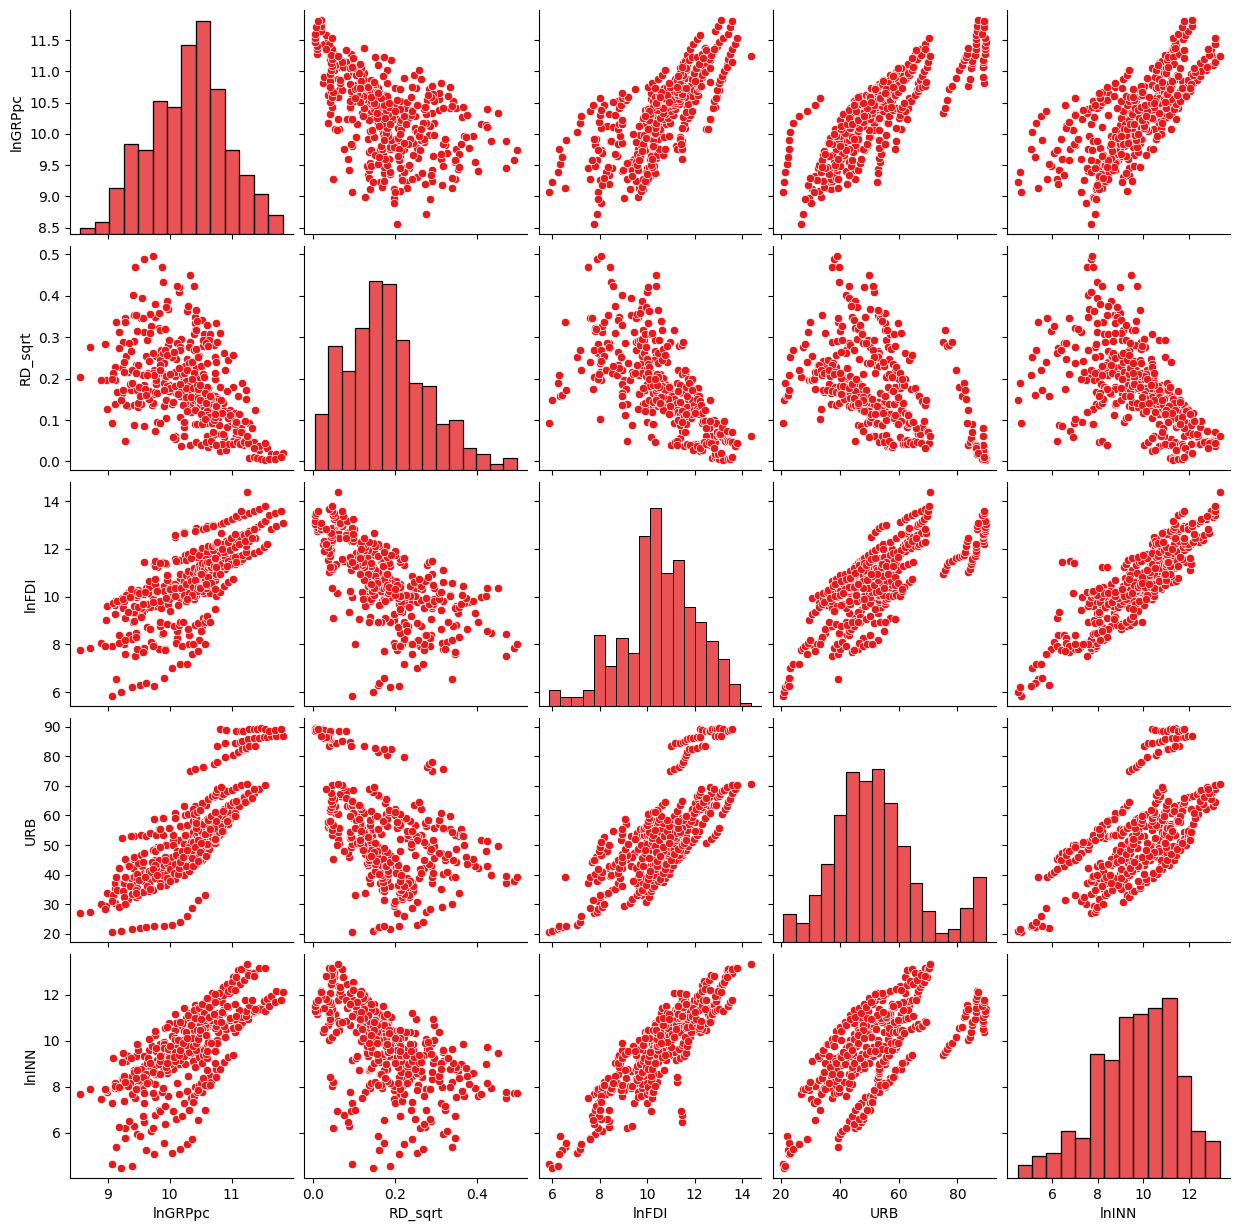

In [233]:
plt.figure(figsize = (12,12))
sns.pairplot(gdf_plt[['lnGRPpc','RD_sqrt','lnFDI','URB','lnINN']])
plt.show()

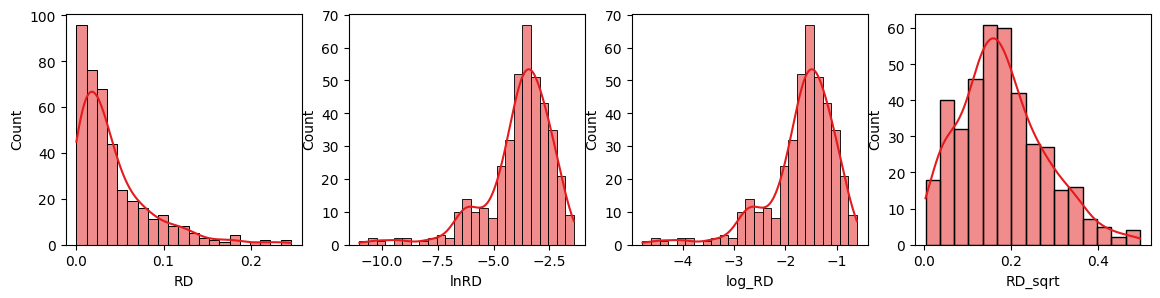

In [234]:
# Transformations on RD
plt.figure(figsize=(14, 3))
plt.subplot(1, 4, 1)
sns.histplot(gdf_plt['RD'],kde=True)
plt.subplot(1, 4, 2)
sns.histplot(gdf_plt['lnRD'],kde=True)
plt.subplot(1, 4, 3)
sns.histplot(gdf_plt['log_RD'],kde=True)
plt.subplot(1, 4, 4)
sns.histplot(gdf_plt['RD_sqrt'],kde=True)
plt.show()

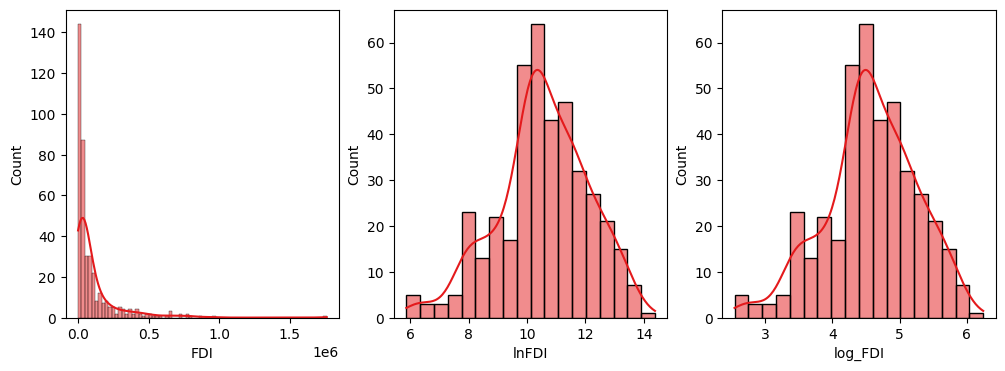

In [235]:
# Transformations on FDI
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(gdf_plt['FDI'],kde=True)
plt.subplot(1, 3, 2)
sns.histplot(gdf_plt['lnFDI'],kde=True)
plt.subplot(1, 3, 3)
sns.histplot(gdf_plt['log_FDI'],kde=True)
plt.show()

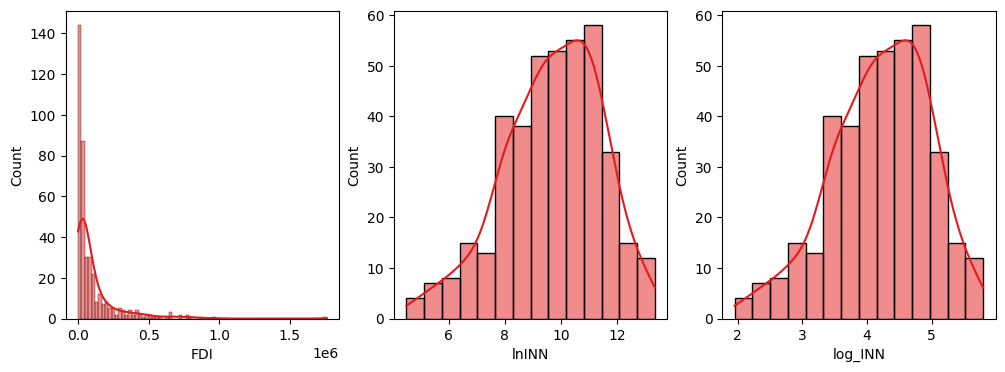

In [236]:
# Transformations on INN
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(gdf_plt['FDI'],kde=True)
plt.subplot(1, 3, 2)
sns.histplot(gdf_plt['lnINN'],kde=True)
plt.subplot(1, 3, 3)
sns.histplot(gdf_plt['log_INN'],kde=True)
plt.show()

As is shown on the plots above, the distribution resource Dependence, GRP per capita, FDI are all right-skewed, therefore we might consider log transformation later.

In [269]:
gdf['RD_sqrt'] = np.sqrt(gdf['RD'])
gdf['lnGRPpc'] = np.log(gdf['GRPpc'])
gdf['lnRD'] = np.log(gdf['RD'])
gdf['lnFDI'] = np.log(gdf['FDI'])
gdf['lnINN'] = np.log(gdf['INN'])
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 403 entries, ('Beijing', 2005) to ('Xinjiang', 2017)
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Region       403 non-null    object  
 1   Year         403 non-null    object  
 2   Area         403 non-null    object  
 3   GRPpc        403 non-null    int64   
 4   GRPpcGrowth  403 non-null    float64 
 5   RD           403 non-null    float64 
 6   FDI          403 non-null    int64   
 7   URB          403 non-null    float64 
 8   INN          403 non-null    int64   
 9   geometry     403 non-null    geometry
 10  RD_sqrt      403 non-null    float64 
 11  lnRD         403 non-null    float64 
 12  lnFDI        403 non-null    float64 
 13  lnINN        403 non-null    float64 
 14  lnGRPpc      403 non-null    float64 
dtypes: float64(8), geometry(1), int64(3), object(3)
memory usage: 50.1+ KB


## Non-spatial Panel Regression

### Pooled Regression

In [270]:
exog = sm.tools.tools.add_constant(gdf['RD_sqrt'])
endog = gdf['lnGRPpc']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids
print(pooledOLS_res.summary)

                          PooledOLS Estimation Summary                          
Dep. Variable:                lnGRPpc   R-squared:                        0.2628
Estimator:                  PooledOLS   R-squared (Between):              0.2935
No. Observations:                 403   R-squared (Within):               0.2359
Date:                Mon, Aug 14 2023   R-squared (Overall):              0.2628
Time:                        23:06:07   Log-likelihood                   -317.96
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      142.95
Entities:                          31   P-value                           0.0000
Avg Obs:                       13.000   Distribution:                   F(1,401)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):             20.808
                            

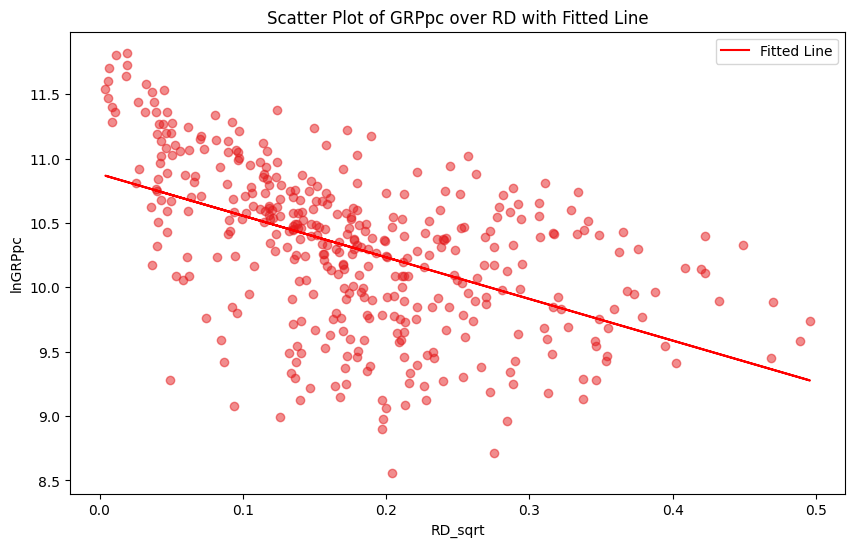

In [272]:
# Scatter plot of GRPpc over RD with the fitted line
plt.figure(figsize=(10, 6))
plt.scatter(gdf['RD_sqrt'], gdf['lnGRPpc'], alpha=0.5)
plt.plot(gdf['RD_sqrt'], fittedvals_pooled_OLS, color='red', label='Fitted Line')
plt.xlabel('RD_sqrt')
plt.ylabel('lnGRPpc')
plt.title('Scatter Plot of GRPpc over RD with Fitted Line')
plt.legend()
plt.show()

#### Homoskedasticity Test

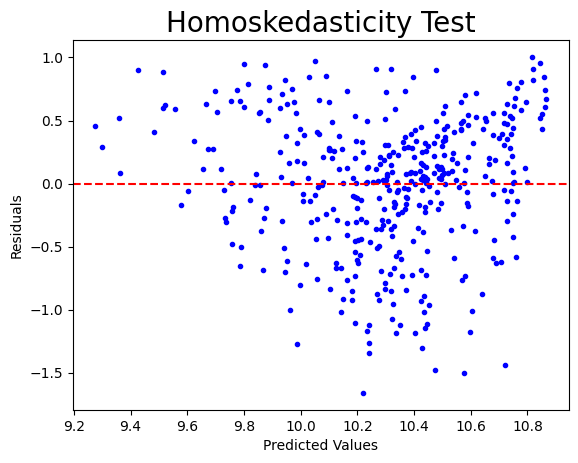

In [273]:
# Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue',marker='.')
ax.axhline(0, color = 'r', ls = '--')

ax.set_xlabel('Predicted Values',fontsize=10)
ax.set_ylabel('Residuals',fontsize=10)
ax.set_title('Homoskedasticity Test', fontsize = 20)
plt.show()


In [274]:

# Run White Test for heteroskedasticity
white_test = het_white(pooledOLS_res.resids, exog)
print("White Test:")
print("LM Statistic:", white_test[0])
print("LM-Test p-value:", white_test[1])
print("F-Statistic:", white_test[2])
print("F-Test p-value:", white_test[3])

# Run Breusch-Pagan Test for heteroskedasticity
bp_test = het_breuschpagan(pooledOLS_res.resids, exog)
print("\nBreusch-Pagan Test:")
print("LM Statistic:", bp_test[0])
print("LM-Test p-value:", bp_test[1])
print("F-Statistic:", bp_test[2])
print("F-Test p-value:", bp_test[3])

White Test:
LM Statistic: 0.07391076547866093
LM-Test p-value: 0.9637191328975946
F-Statistic: 0.03668700908350785
F-Test p-value: 0.9639810476747072

Breusch-Pagan Test:
LM Statistic: 0.038008943001872186
LM-Test p-value: 0.845425182822561
F-Statistic: 0.037823880370898615
F-Test p-value: 0.8458957057477663


The null hypotheses of both test cannot be rejected. Hence we assume the assumption of homoscedasticity is satisfied.

In [276]:
# Durbin Watson Test for Autocorrelation
durbin_watson_test_results = durbin_watson(pooledOLS_res.resids)
print("Durbin-Watson Test Statistic:", durbin_watson_test_results)

Durbin-Watson Test Statistic: 0.6231220771404659


The Durbin-Watson test statistic is a value that ranges from 0 to 4, with a value around 2 indicating no autocorrelation (residuals are independent), a value close to 0 indicating positive autocorrelation, and a value close to 4 indicating negative autocorrelation. If the Durbin-Watson test statistic is 0.623 in your case, it indicates that there is positive autocorrelation in the residuals of the pooled regression of GDPpc (Gross Domestic Product per capita) vs. RD (Resource Dependence). The residuals are positively correlated, suggesting that there is a pattern or structure in the errors that the model did not capture. This violates one of the assumptions of the classical linear regression model, which assumes that the errors are independent and identically distributed (i.e., no autocorrelation).

### FE and RE

In [277]:
# FE und RE model
exog = sm.tools.tools.add_constant(gdf['RD_sqrt'])
endog = gdf['lnGRPpc']
# random effects model
model_re = RandomEffects(endog, exog)
re_res = model_re.fit()
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True)
fe_res = model_fe.fit()
#print results
print(re_res)
print(fe_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                lnGRPpc   R-squared:                        0.2736
Estimator:              RandomEffects   R-squared (Between):              0.0692
No. Observations:                 403   R-squared (Within):               0.2898
Date:                Mon, Aug 14 2023   R-squared (Overall):              0.1868
Time:                        23:10:09   Log-likelihood                   -203.69
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      151.03
Entities:                          31   P-value                           0.0000
Avg Obs:                       13.000   Distribution:                   F(1,401)
Min Obs:                       13.000                                           
Max Obs:                       13.000   F-statistic (robust):             151.03
                            

In [284]:
from linearmodels.panel import compare
print(compare({"RE": re_res, "FE": fe_res}))

                    Model Comparison                    
                                       RE             FE
--------------------------------------------------------
Dep. Variable                     lnGRPpc        lnGRPpc
Estimator                   RandomEffects       PanelOLS
No. Observations                      403            403
Cov. Est.                      Unadjusted     Unadjusted
R-squared                          0.2736         0.2978
R-Squared (Within)                 0.2898         0.2978
R-Squared (Between)                0.0692        -0.1720
R-Squared (Overall)                0.1868         0.0785
F-statistic                        151.03         157.31
P-value (F-stat)                   0.0000         0.0000
=====================     ===============   ============
const                              11.191         11.365
                                 (113.73)       (130.35)
RD_sqrt                           -4.9728        -5.9423
                               



*  Both the random effects and fixed effects models have low p-values (close to 0.0000), indicating that the models are statistically significant.
*  In both models, the coefficient for RD is negative. This means that there is a negative relationship between RD and GRPpc.
* The p-value for the F-test for poolability is close to 0.0000, indicating that we reject the null hypothesis of poolability. This means that the individual entities have different effects on the dependent variable, and the fixed effects model is more appropriate.



In [289]:
# Hausman Test
def hausman(fe, re):
 b = fe.params
 B = re.params
 v_b = fe.cov
 v_B = re.cov
 df = b[np.abs(b) < 1e8].size
 chi2 = np.dot((b-B).T, la.inv(v_b - v_B).dot(b - B))

 pval = stats.chi2.sf(chi2, df)
 return chi2, df, pval

hausman_results = hausman(fe_res, re_res)
print('chi-Squared:'  + str(hausman_results[0]))
print('degrees of freedom:'  + str(hausman_results[1]))
print('p-Value:'  + str(hausman_results[2]))

chi-Squared:15.475588077306139
degrees of freedom:2
p-Value:0.0004360323855222241


The null hypothesis of Hausman test is that the random effect model is better. Here the p value is 0.506779589386793 which is higher than conventional significance level 0.05, so we could not reject the null hypothesis. The fixed effect model is better here.

### Multivariable regression.

In [293]:
# import statsmodels.api as sm
# from linearmodels.panel import PanelOLS, RandomEffects

# Pooled Panel Regression
exog_pooled = sm.add_constant(gdf[['RD_sqrt', 'lnFDI', 'URB','lnINN']])
endog_pooled = gdf['lnGRPpc']
pooled_model = sm.OLS(endog_pooled, exog_pooled).fit()
print(pooled_model.summary())

# Fixed Effects Panel Regression
exog_fe = gdf[['RD_sqrt', 'lnFDI', 'URB','lnINN']]
endog_fe = gdf['lnGRPpc']
fe_model = PanelOLS(endog_fe, exog_fe, entity_effects=True).fit()
print(fe_model.summary)

# Random Effects Panel Regression
exog_re = sm.add_constant(gdf[['RD_sqrt', 'lnFDI', 'URB','lnINN']])
endog_re = gdf['lnGRPpc']
re_model = RandomEffects(endog_re, exog_re).fit()
print(re_model.summary)

                            OLS Regression Results                            
Dep. Variable:                lnGRPpc   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     306.3
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          4.91e-120
Time:                        23:39:00   Log-Likelihood:                -96.144
No. Observations:                 403   AIC:                             202.3
Df Residuals:                     398   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5757      0.169     50.808      0.0

In [280]:
# Summarize the individual effect of both models
fe_effects = fe_model.estimated_effects.rename(columns = {'estimated_effects':'fixed_effects'}).groupby('Region').mean()
re_effects = re_model.estimated_effects.rename(columns = {'estimated_effects':'random_effects'}).groupby('Region').mean()
average_effects = fe_effects.merge(re_effects,left_index = True, right_index = True)
average_effects = average_effects.merge(bd, how = "left", left_on = "Region",right_on = "NAME")
average_effects = gpd.GeoDataFrame(average_effects, geometry='geometry')
average_effects.head()

,fixed_effects,random_effects,NAME,Area,geometry
0,-0.142724,-0.162477,Anhui,East China,"POLYGON ((1016688.415 4289114.800, 1018854.016..."
1,-0.646350,-0.362741,Beijing,North China,"POLYGON ((1010323.556 4895263.551, 1010877.501..."
2,-0.118156,-0.112498,Chongqing,Southwest China,"POLYGON ((332451.927 3955074.268, 339116.398 3..."
3,-0.088192,0.027275,Fujian,East China,"POLYGON ((1353003.390 3630724.022, 1355278.847..."
4,0.443479,0.169350,Gansu,Northwest China,"POLYGON ((-751297.370 5039780.785, -742575.233..."


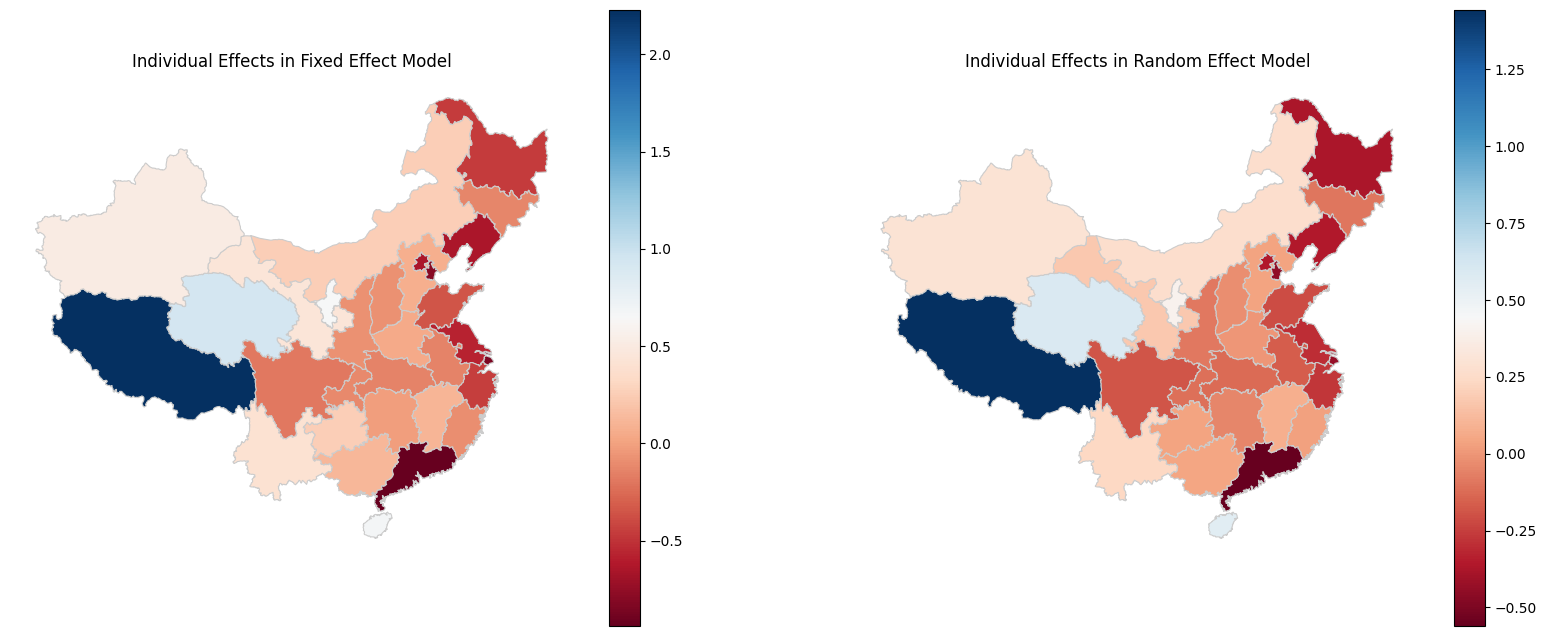

In [281]:
# Plotting choropleth maps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Choropleth map for RD values at year 2005
average_effects.plot(column="fixed_effects", cmap="RdBu", linewidth=0.8, edgecolor="0.8", legend=True,ax = ax1)
ax1.set_title("Individual Effects in Fixed Effect Model")
ax1.axis("off")

# Choropleth map for RD values at year 2017
average_effects.plot(column="random_effects", cmap="RdBu", linewidth=0.8, edgecolor="0.8", legend=True, ax = ax2)
ax2.set_title("Individual Effects in Random Effect Model")
ax2.axis("off")

# Show the plot
plt.show()


The Jarque-Bera test is a statistical test that compares whether sample data have the skewness and kurtosis matching a normal distribution. The null hypothesis for the test is that the data are normally distributed.

In [282]:
# Normality Test
from scipy.stats import jarque_bera

jb_fe = jarque_bera(fe_model.resids)
jb_re = jarque_bera(re_model.resids)

print(f"FE Model: Jarque-Bera statistic = {jb_fe[0]}, p-value = {jb_fe[1]}")
print(f"RE Model: Jarque-Bera statistic = {jb_re[0]}, p-value = {jb_re[1]}")


FE Model: Jarque-Bera statistic = 88.19540970501261, p-value = 7.056837516957242e-20
RE Model: Jarque-Bera statistic = 100.83612574309981, p-value = 1.2697362151861722e-22


The results from the Jarque-Bera test indicate that the residuals (errors) from both the FE and RE models do not follow a normal distribution. This might suggest potential issues with the models, as normally distributed residuals are one of the assumptions behind many statistical tests and models.

In [250]:
# # Test for Serial Correlation
# from linearmodels.panel.diagnostic import wooldridge_test
# print(wooldridge_test(fe_model))
# print(wooldridge_test(re_model))

The Breusch-Pagan test is used to detect the presence of heteroscedasticity in the residuals of a regression model. The null hypothesis $H_0$
  for the test is that the error variances are all equal (no heteroscedasticity), and the alternative hypothesis $H_1$
  is that the error variances are not equal (heteroscedasticity is present).

In [251]:
# Breusch-Pagan Test for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test_fe = het_breuschpagan(fe_model.resids, exog_fe)
bp_test_re = het_breuschpagan(re_model.resids, exog_re)

print(f"FE Model: Breusch-Pagan test LM statistic = {bp_test_fe[0]}, p-value = {bp_test_fe[1]}")
print(f"RE Model: Breusch-Pagan test LM statistic = {bp_test_re[0]}, p-value = {bp_test_re[1]}")


FE Model: Breusch-Pagan test LM statistic = 39.83716362569651, p-value = 4.6773736992139446e-08
RE Model: Breusch-Pagan test LM statistic = 67.11795945536508, p-value = 9.206216809106686e-14


Both the fixed effects and random effects models show evidence of heteroscedasticity in their residuals based on the Breusch-Pagan test results. This suggests that the error terms do not have a constant variance.

In [252]:
# from linearmodels.panel import PanelOLS
# from linearmodels.panel.results import PanelModelComparison

# comparison = PanelModelComparison({'FE': fe_model, 'RE': re_model}, weights=True)
# print(comparison.first_difference.diagnostics)


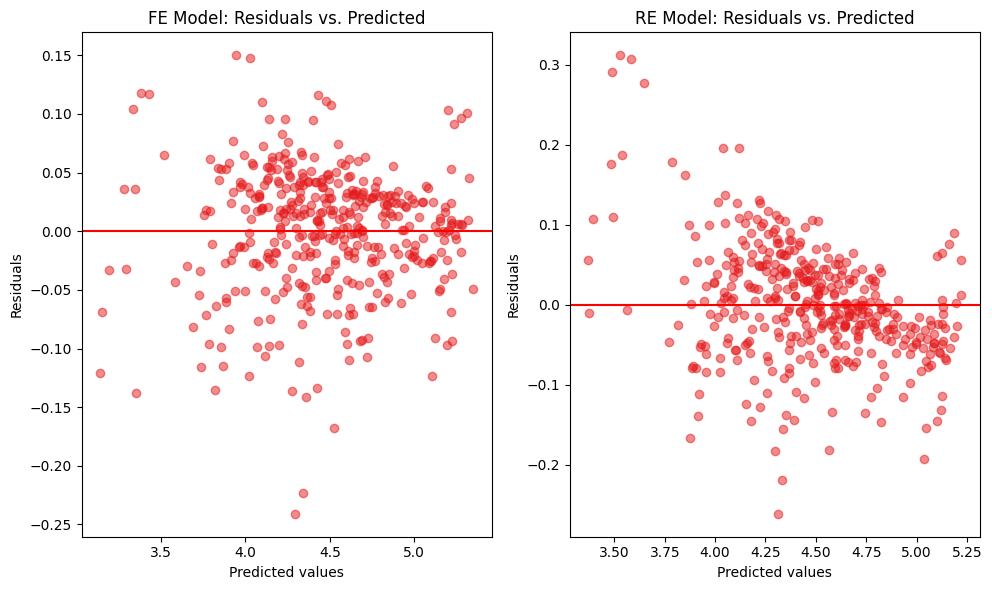

In [253]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(fe_model.predict(), fe_model.resids, alpha=0.5)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title("FE Model: Residuals vs. Predicted")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.subplot(1, 2, 2)
plt.scatter(re_model.predict(), re_model.resids, alpha=0.5)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.title("RE Model: Residuals vs. Predicted")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()


In [291]:
#Hausman Test
def hausman(fe, re):
  b = fe.params
  B = re.params
  v_b = fe.cov
  v_B = re.cov

  df = b[np.abs(b) < 1e8].size
  chi2 = np.dot((b-B).T,
                la.inv(v_b-v_B).dot(b-B))
  pval = stats.chi2.sf(chi2, df)
  return chi2, df, pval

hausman_results = hausman(fe_model, re_model)
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))


chi-Squared: -240.7701472756438
degrees of freedom: 5
p-Value: 1.0


In [255]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]
    return vif_data

In [256]:
X_fe = gdf[['log_RD', 'log_FDI', 'URB','log_INN']]
print(calculate_vif(X_fe))


  Variable         VIF
0   log_RD   12.925574
1  log_FDI  174.761139
2      URB   30.441813
3  log_INN  135.447115


In [257]:
X_re = gdf[['log_RD', 'log_FDI', 'URB','log_INN']]
# In this case, it's the same as fe_model but in practice might be different
print(calculate_vif(X_re))


  Variable         VIF
0   log_RD   12.925574
1  log_FDI  174.761139
2      URB   30.441813
3  log_INN  135.447115


## Spatial Analysis

### Spatial Weight Matrix

In [258]:
import geopandas as gpd
import libpysal as lps

# Create the spatial weights matrix using Queen contiguity
w = lps.weights.Queen.from_dataframe(bd)

# Find the index of the island (from the warning it is 18) and Guangdong
island_index = 18
guangdong_index = bd[bd['NAME'] == 'Guangdong'].index[0]

# Make the island a neighbor of Guangdong and vice versa
if island_index not in w.neighbors[guangdong_index]:
    w.neighbors[guangdong_index].append(island_index)
    w.weights[guangdong_index].append(1)

if guangdong_index not in w.neighbors[island_index]:
    w.neighbors[island_index].append(guangdong_index)
    w.weights[island_index].append(1)

# Row-standardize the matrix
w.transform = 'R'
# Display the results
w.neighbors

/usr/local/lib/python3.10/dist-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 18.
  warnings.warn(message)


{0: [25, 19],
 1: [4, 22, 23],
 2: [24, 25, 27, 6],
 3: [24, 25, 23],
 4: [1, 13, 22, 30],
 5: [8, 27, 6, 7],
 6: [2, 5, 8, 9, 27, 24],
 7: [8, 10, 28, 5],
 8: [5, 6, 7, 9, 10, 11],
 9: [6, 8, 24, 26, 11, 12],
 10: [7, 8, 11, 28, 15],
 11: [17, 8, 9, 10, 12, 15],
 12: [16, 17, 9, 26, 11, 14],
 13: [16, 4, 14, 30],
 14: [16, 26, 12, 13, 30],
 15: [17, 10, 11],
 16: [17, 12, 13, 14],
 17: [16, 11, 12, 15, 18],
 18: [17],
 19: [0, 25, 20],
 20: [27, 25, 19],
 21: [27, 29],
 22: [1, 4, 30, 23],
 23: [1, 3, 22, 24, 25, 30],
 24: [2, 3, 6, 9, 23, 25, 26, 30],
 25: [0, 2, 3, 19, 20, 23, 24, 27],
 26: [30, 24, 9, 12, 14],
 27: [2, 20, 5, 6, 21, 25, 29],
 28: [10, 7],
 29: [27, 21],
 30: [4, 22, 23, 24, 26, 13, 14]}

### Spatial Autocorrelation Analysis


In [259]:
# import geopandas as gpd
# import libpysal as lps
from esda.moran import Moran

# Create a list to hold results
morans = []

# For each unique year in the gdf
for year in gdf.index.get_level_values('Year').unique():
    # Filter data for that specific year
    year_data = gdf.xs(year, level='Year')

    # Compute Moran's I
    mi = Moran(year_data['GRPpc'], w)

    morans.append((year, mi.I, mi.p_sim))

# Convert results to a numpy array for easier viewing
morans = np.array(morans)

# Print the results
for year, I, p in morans:
    print(f"Year: {int(year)}, Moran's I: {I:.5f}, p-value: {p:.5f}")

Year: 2005, Moran's I: -0.05967, p-value: 0.44000
Year: 2006, Moran's I: -0.05912, p-value: 0.45700
Year: 2007, Moran's I: -0.05921, p-value: 0.44600
Year: 2008, Moran's I: -0.06459, p-value: 0.41400
Year: 2009, Moran's I: -0.05327, p-value: 0.48300
Year: 2010, Moran's I: -0.05542, p-value: 0.44100
Year: 2011, Moran's I: -0.05288, p-value: 0.46900
Year: 2012, Moran's I: -0.05024, p-value: 0.48500
Year: 2013, Moran's I: -0.04333, p-value: 0.49700
Year: 2014, Moran's I: -0.03529, p-value: 0.45200
Year: 2015, Moran's I: -0.02749, p-value: 0.43100
Year: 2016, Moran's I: -0.02197, p-value: 0.41900
Year: 2017, Moran's I: -0.02582, p-value: 0.42300
